In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mydata/Churn_Modelling.csv


In [78]:
import pandas as pd
df=pd.read_csv("/kaggle/input/mydata/Churn_Modelling.csv")


In [79]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [82]:
df.duplicated().sum()

0

In [83]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [84]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [85]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [86]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [87]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [88]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [89]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [90]:
X=df.drop(columns=["Exited"])
y=df["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
X_train.shape

(8000, 11)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_sclaed=scaler.transform(X_test)

In [93]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [94]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [95]:
model=Sequential()
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [112]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.3135 - val_accuracy: 0.8600 - val_loss: 0.3462
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3108 - val_accuracy: 0.8581 - val_loss: 0.3470
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3187 - val_accuracy: 0.8550 - val_loss: 0.3457
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8678 - loss: 0.3270 - val_accuracy: 0.8581 - val_loss: 0.3461
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8749 - loss: 0.3100 - val_accuracy: 0.8550 - val_loss: 0.3458
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3188 - val_accuracy: 0.8544 - val_loss: 0.3462
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3032 - val_accuracy: 0.8544 - val_loss: 0.3455
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3274 - val_accu

In [108]:
model.layers[1].get_weights()

[array([[-2.35432386e-01, -4.35055137e-01,  1.33476150e+00,
         -1.22781861e+00,  9.47720826e-01,  4.80571747e-01,
         -1.21531129e+00,  4.73273359e-02,  5.68257332e-01,
         -5.27073801e-01, -8.60666394e-01],
        [ 8.67446512e-02, -6.86113238e-02, -5.94559610e-02,
          8.59494880e-02,  7.12218583e-01,  3.50567549e-01,
          6.48982078e-02,  3.58860865e-02,  9.28813994e-01,
         -2.62504220e-01, -7.27154374e-01],
        [-5.43375254e-01,  7.59564757e-01, -8.90541375e-01,
         -5.74654162e-01, -2.91872889e-01, -5.87020755e-01,
         -5.10891140e-01, -9.92180556e-02,  3.77118766e-01,
         -4.07384813e-01, -7.57969737e-01],
        [ 1.69495225e-01,  4.24582154e-01, -1.14952847e-02,
          5.38961053e-01, -2.07873825e-02, -2.09788188e-01,
          4.65011507e-01,  2.65219122e-01,  6.65598810e-02,
          4.84794259e-01, -1.62553167e+00],
        [ 3.81011069e-01, -3.27485770e-01, -7.65958577e-02,
          1.06730975e-01,  4.27202255e-01,  

In [109]:
y_log=model.predict(X_test_sclaed)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [110]:
#Threshold=0.5
y_pred=np.where(y_log>0.5,1,0)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [103]:
#Increasing number of epochs
#relu is best actvation function


In [114]:
import matplotlib.pyplot as plt

In [115]:
history.history

{'accuracy': [0.8689062595367432,
  0.8687499761581421,
  0.8690624833106995,
  0.8690624833106995,
  0.8712499737739563,
  0.8695312738418579,
  0.8696874976158142,
  0.8689062595367432,
  0.8692187666893005,
  0.8696874976158142,
  0.8701562285423279,
  0.8684375286102295,
  0.8689062595367432,
  0.8690624833106995,
  0.8692187666893005,
  0.8681250214576721,
  0.8698437213897705,
  0.8690624833106995,
  0.8696874976158142,
  0.8692187666893005,
  0.870312511920929,
  0.8687499761581421,
  0.8690624833106995,
  0.8689062595367432,
  0.8690624833106995,
  0.8673437237739563,
  0.8695312738418579,
  0.8682812452316284,
  0.8701562285423279,
  0.870312511920929,
  0.8687499761581421,
  0.870312511920929,
  0.8689062595367432,
  0.8676562309265137,
  0.8693749904632568,
  0.8687499761581421,
  0.8692187666893005,
  0.8715624809265137,
  0.8701562285423279,
  0.8695312738418579,
  0.8687499761581421,
  0.8706250190734863,
  0.8690624833106995,
  0.8700000047683716,
  0.8704687356948853,
 

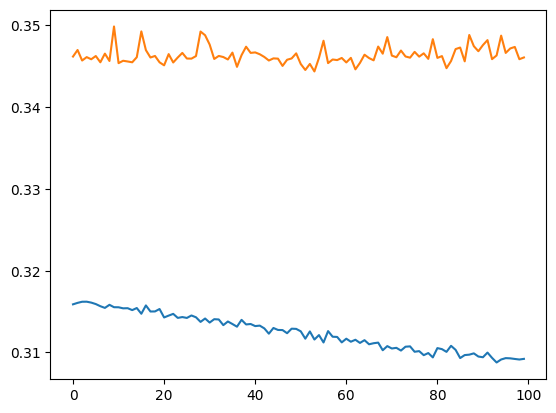

In [117]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

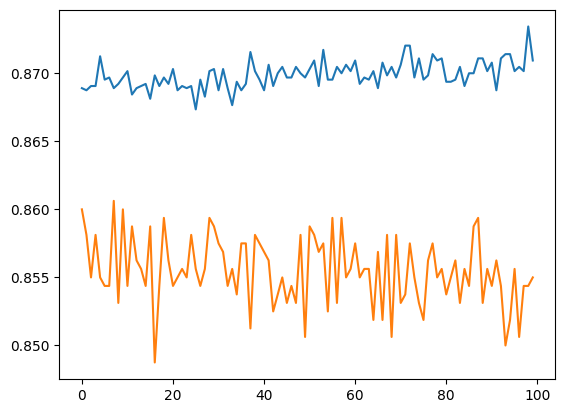

In [118]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])